# Description

In this demo we will look at the cost of a sparse matrix-vector multipy ($A * v$) for different sparse matrix formats.

In [1]:
from pyamg import gallery
import numpy as np
from time import time
import matplotlib.pyplot as plt
from common import set_figure
set_figure(width=600)

# Set up problem sizes

Set up the tests to do `ntrials` of $w \leftarrow A * v$ at different sizes in `nlist` with `nnzperrow` non-zeros per row on average

In [2]:
types = ['csr', 'coo', 'csc', 'lil']
k = np.arange(1, 10)
nv = np.array([100, 1000])
nlist = np.kron(nv, k)
ntrials = 10
nnzperrow = 50

## set up containers

In [3]:
times = {a: np.zeros((len(nlist), ntrials)) for a in types}
A = {a: [] for a in types}
nnz = []

## create matrix and time it

In [4]:
for j, n in enumerate(nlist):
    print("n = %d" % n)
    tmp = time()
    A['csr'] = gallery.sprand(n, n, float(nnzperrow) / n, format='csr')
    tmp = time() - tmp
    print("    setup: %g" % tmp)
    v = np.random.rand(n,)
    w = 0 * v.copy()
    for tp in types:
        if tp == 'csr':
            nnz.append(A[tp].nnz)
        if tp != 'csr':
            A[tp] = getattr(A['csr'], 'to' + tp)()
        for i in range(ntrials):
            tmp = time()
            w = A[tp] * v
            tmp = time() - tmp
            times[tp][j, i] = tmp
        print("    mat-vec %s: %g" % (tp, tmp))

n = 100
    setup: 0.00216913
    mat-vec csr: 6.91414e-06
    mat-vec coo: 1.09673e-05
    mat-vec csc: 2.00272e-05
    mat-vec lil: 8.98838e-05
n = 200
    setup: 0.00157523
    mat-vec csr: 2.21729e-05
    mat-vec coo: 2.09808e-05
    mat-vec csc: 1.21593e-05
    mat-vec lil: 0.000115156
n = 300
    setup: 0.00163198
    mat-vec csr: 1.4782e-05
    mat-vec coo: 2.90871e-05
    mat-vec csc: 1.5974e-05
    mat-vec lil: 0.000145197
n = 400
    setup: 0.00197196
    mat-vec csr: 1.88351e-05
    mat-vec coo: 3.76701e-05
    mat-vec csc: 1.97887e-05
    mat-vec lil: 0.000172138
n = 500
    setup: 0.00197196
    mat-vec csr: 2.19345e-05
    mat-vec coo: 4.79221e-05
    mat-vec csc: 2.40803e-05
    mat-vec lil: 0.00020504
n = 600
    setup: 0.00309896
    mat-vec csr: 3.19481e-05
    mat-vec coo: 6.8903e-05
    mat-vec csc: 3.29018e-05
    mat-vec lil: 0.000247002
n = 700
    setup: 0.00318074
    mat-vec csr: 3.12328e-05
    mat-vec coo: 6.50883e-05
    mat-vec csc: 3.21865e-05
    mat-vec

# Plot problem size (nnz) and times in log-log

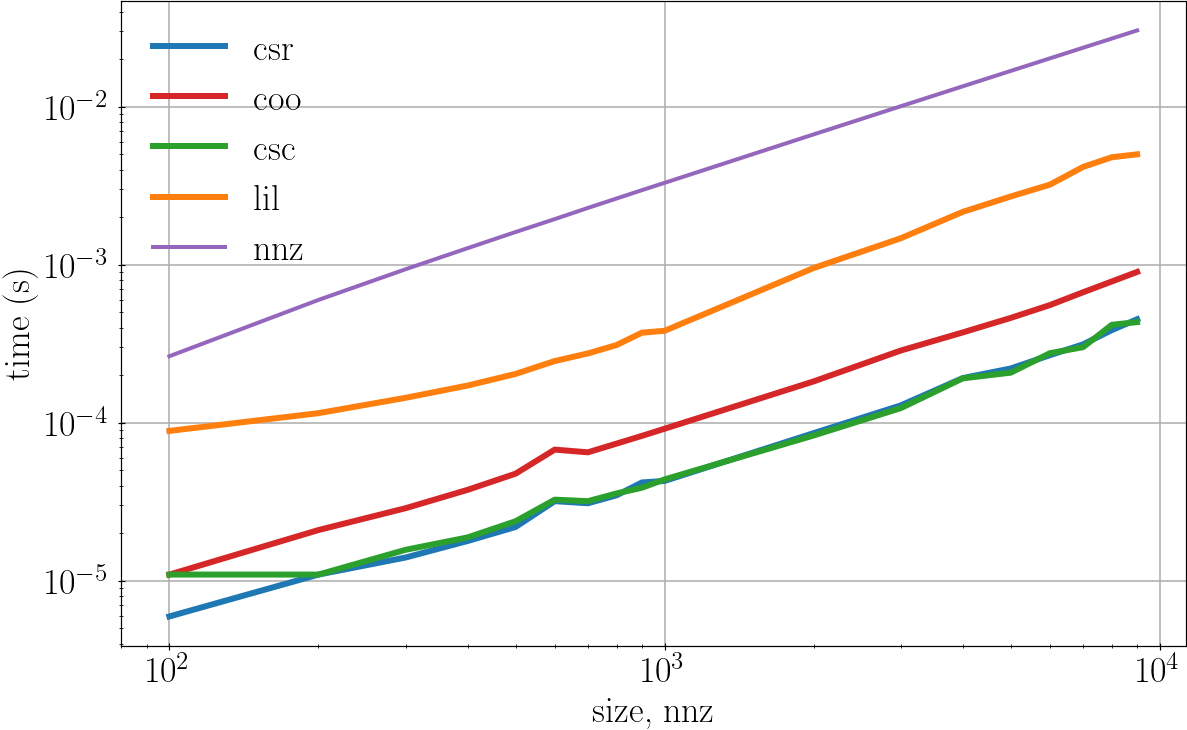

In [6]:
nnz = np.array(nnz)
for tp in types:
    plt.loglog(nlist, times[tp].min(axis=1), label=tp, lw=3)
plt.loglog(nlist, nnz / nnz[0] * times['csr'][0, 0], label='nnz')
plt.xlabel('size, nnz')
plt.ylabel('time (s)')
plt.grid(True)
plt.legend()
plt.show()